In [1]:
!pip install -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import wandb
import glob

## Montage / tile the each 4 images for each house

In [3]:
!git clone https://github.com/emanhamed/Houses-dataset

Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165
Receiving objects: 100% (2166/2166), 176.26 MiB | 41.27 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [4]:
inputpath = "/content/Houses-dataset/Houses Dataset"

## there is a Housesinfo.txt file(csv without comma) in 'Houses Dataset' folder that should be remove

In [5]:
new_inputpath = "/content/drive/MyDrive/Houses Dataset"
images_list = []
for image in os.listdir(new_inputpath):
  img = cv2.imread("/content/drive/MyDrive/Houses Dataset/" + image)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  images_list.append(img)

In [6]:
df_images = pd.Series(images_list, name="Images")
df_images

0       [[[68, 66, 51], [70, 68, 53], [70, 68, 53], [6...
1       [[[72, 52, 27], [72, 52, 27], [72, 52, 27], [7...
2       [[[43, 93, 166], [44, 94, 167], [45, 95, 168],...
3       [[[111, 113, 125], [110, 112, 124], [110, 112,...
4       [[[132, 165, 242], [96, 129, 206], [103, 136, ...
                              ...                        
2135    [[[33, 89, 184], [36, 92, 187], [35, 91, 186],...
2136    [[[254, 254, 254], [254, 254, 254], [254, 254,...
2137    [[[184, 151, 110], [147, 114, 73], [155, 120, ...
2138    [[[195, 163, 124], [195, 163, 124], [195, 163,...
2139    [[[214, 160, 98], [214, 160, 98], [214, 160, 9...
Name: Images, Length: 2140, dtype: object

# convert txt file to csv :



convert space-delimiter in text file , into comma in csv file:

In [ ]:
with open('/content/HousesInfo.txt') as infile:
    data = infile.read().replace(' ', ',')
    print(data, file=open('house_price_info.csv', 'w'))

In [9]:
df_info = pd.read_csv('/content/house_price_info.csv')
df_info

,Bedrooms,bathrooms,Area,Zipcode,Price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


# نکته
# در کل ۲۱۴۰ تا تصویر داریم اما تعداد سطر های فایل سی اس وی ۵۳۵ تاست

# به دلیل اینکه هرچهارتا تصویر مربوط به یک خانه اند و در کل تعداد سطر های دیتافریم به این صورت باید باشد :
# **2140 / 4  = 535**

In [10]:
df_images.shape

(2140,)

In [11]:
df_info.shape

(535, 5)

# راه حل :

# پس اول باید هر ۴ عکس مربوط به هرخانه را به هم متصل کنیم تا تعداد تصاویر در نهایت ۵۳۵ تا بشود :

In [12]:
df_info.shape[0]

535

# make farme of 4 images :

In [13]:

images = []

for i in range(df_info.shape[0]) :
  basePath = os.path.sep.join([new_inputpath, "{}_*".format(i + 1)])
  housePaths = sorted(list(glob.glob(basePath)))
  print(housePaths)
  inputImages = []
  outputImage = np.zeros((200, 200, 3), dtype="uint8")

  for housePath in housePaths:
    image = cv2.imread(housePath)
    image = cv2.resize(image, (100, 100))
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    inputImages.append(image)

  outputImage[0:100, 0:100] = inputImages[0]
  outputImage[0:100, 100:200] = inputImages[1]
  outputImage[100:200, 100:200] = inputImages[2]
  outputImage[100:200, 0:100] = inputImages[3]
  images.append(outputImage)

images = np.array(images)

['/content/drive/MyDrive/Houses Dataset/1_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/1_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/1_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/1_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/2_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/2_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/2_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/2_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/3_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/3_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/3_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/3_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/4_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/4_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/4_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/4_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/5_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/5_bedroom.jpg', 

In [14]:
print(housePaths[0])
print(housePaths[1])
print(housePaths[2])
print(housePaths[3])

/content/drive/MyDrive/Houses Dataset/535_bathroom.jpg
/content/drive/MyDrive/Houses Dataset/535_bedroom.jpg
/content/drive/MyDrive/Houses Dataset/535_frontal.jpg
/content/drive/MyDrive/Houses Dataset/535_kitchen.jpg


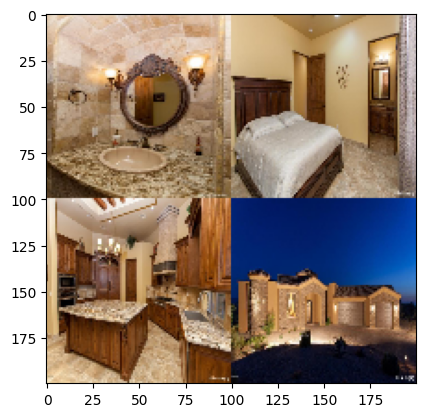

In [15]:
plt.imshow(images[1])

In [16]:
images[1].shape

(200, 200, 3)

In [17]:
images.shape

(535, 200, 200, 3)

In [18]:
images_list = []
for i in range(535):
  images_list.append(images[i])

images = pd.Series(images_list, name="Images")

# now we concat images list to dataframe :

In [19]:
df = pd.concat([images , df_info], axis=1)
df

,Images,Bedrooms,bathrooms,Area,Zipcode,Price
0,"[[[171, 150, 119], [175, 150, 109], [123, 88, ...",4,4.0,4053,85255,869500
1,"[[[229, 205, 178], [227, 205, 182], [227, 209,...",4,3.0,3343,36372,865200
2,"[[[89, 42, 13], [100, 54, 31], [125, 85, 70], ...",3,4.0,3923,85266,889000
3,"[[[247, 204, 162], [251, 206, 165], [255, 212,...",5,5.0,4022,85262,910000
4,"[[[224, 250, 253], [91, 93, 84], [186, 156, 11...",3,4.0,4116,85266,971226
...,...,...,...,...,...,...
530,"[[[231, 231, 230], [242, 242, 242], [246, 246,...",5,2.0,2066,94531,399900
531,"[[[181, 180, 180], [222, 221, 220], [206, 206,...",4,3.5,9536,94531,460000
532,"[[[34, 32, 32], [36, 34, 35], [31, 30, 31], [3...",3,2.0,2014,94531,407000
533,"[[[252, 252, 252], [251, 251, 251], [248, 248,...",4,3.0,2312,94531,419000


In [20]:
df["bathrooms"] = df["bathrooms"].astype(int)
df

,Images,Bedrooms,bathrooms,Area,Zipcode,Price
0,"[[[171, 150, 119], [175, 150, 109], [123, 88, ...",4,4,4053,85255,869500
1,"[[[229, 205, 178], [227, 205, 182], [227, 209,...",4,3,3343,36372,865200
2,"[[[89, 42, 13], [100, 54, 31], [125, 85, 70], ...",3,4,3923,85266,889000
3,"[[[247, 204, 162], [251, 206, 165], [255, 212,...",5,5,4022,85262,910000
4,"[[[224, 250, 253], [91, 93, 84], [186, 156, 11...",3,4,4116,85266,971226
...,...,...,...,...,...,...
530,"[[[231, 231, 230], [242, 242, 242], [246, 246,...",5,2,2066,94531,399900
531,"[[[181, 180, 180], [222, 221, 220], [206, 206,...",4,3,9536,94531,460000
532,"[[[34, 32, 32], [36, 34, 35], [31, 30, 31], [3...",3,2,2014,94531,407000
533,"[[[252, 252, 252], [251, 251, 251], [248, 248,...",4,3,2312,94531,419000


# Create model & train :

In [21]:
X = np.array(df["Images"].values.tolist())
Y = np.array(df["Price"].values.tolist())

print(X.shape)
print(Y.shape)


(535, 200, 200, 3)
(535,)


In [22]:
from sklearn.model_selection import train_test_split

X_train , X_val , Y_train , Y_val = train_test_split(X , Y , test_size=0.1)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(481, 200, 200, 3)
(54, 200, 200, 3)
(481,)
(54,)


In [23]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = image_data_generator.flow(
    X_train,
    Y_train,
    shuffle=True
)

validation_data = image_data_generator.flow(
    X_val,
    Y_val,
    batch_size=16,
    shuffle=False
)

In [24]:
del X
del Y
del df
del images
del image

# wandb

In [25]:
run = wandb.init(project="House_price_prediction")

from wandb.sdk.wandb_run import wandb_metric
config = wandb.config
from wandb.keras import (
   WandbMetricsLogger,
   WandbModelCheckpoint,
)

wandb_callbacks = [
   WandbMetricsLogger(log_freq=5),
   WandbModelCheckpoint("models"),
]


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [36]:
initial_model = tf.keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(200,200,3),
    pooling="avg"
)

In [37]:
for layer in initial_model.layers:
  layer.trainable = False

In [39]:

model = tf.keras.Sequential([
    initial_model,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="tanh")
])


model.compile(loss=tf.keras.losses.mean_absolute_percentage_error , optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)) # chon regression hast niyazi be accuracy nadarim

history = model.fit(train_data , validation_data=validation_data , epochs=15 , callbacks=wandb_callbacks)

Epoch 1/15
16/16 [==============================] - ETA: 0s - loss: 99.9999  

wandb: Adding directory to artifact (./models)... Done. 0.3s


16/16 [==============================] - 306s 19s/step - loss: 99.9999 - val_loss: 99.9998
Epoch 2/15
16/16 [==============================] - ETA: 0s - loss: 99.9997 

wandb: Adding directory to artifact (./models)... Done. 0.3s


16/16 [==============================] - 298s 19s/step - loss: 99.9997 - val_loss: 99.9997
Epoch 3/15
16/16 [==============================] - ETA: 0s - loss: 99.9997 

wandb: Adding directory to artifact (./models)... Done. 0.3s


16/16 [==============================] - 301s 19s/step - loss: 99.9997 - val_loss: 99.9997
Epoch 4/15
16/16 [==============================] - ETA: 0s - loss: 99.9996 

wandb: Adding directory to artifact (./models)... Done. 3.8s


16/16 [==============================] - 290s 18s/step - loss: 99.9996 - val_loss: 99.9997
Epoch 5/15
16/16 [==============================] - ETA: 0s - loss: 99.9996 

KeyboardInterrupt: ignored

In [ ]:
model.save("/content/drive/MyDrive/House_price.keras")

# Inference

In [ ]:
model= tf.keras.models.losd_model("/content/drive/MyDrive/House_price.keras")

In [ ]:
test_images_list = []
test_images_dir = "/content/test"
for image in os.listdir(test_images_dir):
  img = cv2.imread("/content/test/" + image)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  test_images_list.append(img)


In [ ]:
df_images = pd.Series(test_images_list, name="Images")
df_images

In [ ]:
images=[]
for i in range(1) :
  basePath = os.path.sep.join([test_images_dir, "{}_*".format(i + 1)])
  print(basePath)
  housePaths = sorted(list(glob.glob(basePath)))
  print(housePaths)
  inputImages = []
  outputImage = np.zeros((200, 200, 3), dtype="uint8")

  for housePath in housePaths:
    image = cv2.imread(housePath)
    image = cv2.resize(image, (100, 100))
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    inputImages.append(image)

  outputImage[0:100, 0:100] = inputImages[0]
  outputImage[0:100, 100:200] = inputImages[1]
  outputImage[100:200, 100:200] = inputImages[2]
  outputImage[100:200, 0:100] = inputImages[3]
  images.append(outputImage)

  images = np.array(images)

In [ ]:
print(housePaths[0])
print(housePaths[1])
print(housePaths[2])
print(housePaths[3])


In [ ]:
plt.imshow(images[0])

In [ ]:
new_image = cv2.resize(images[0] , (200,200))
plt.imshow(new_image)
new_image = new_image / 255.0
new_image = np.reshape(new_image, [1, 200, 200, 3]) # new_iamge.reshape(1,299,299,3)

output = model.predict(new_image)
print('predicted Price : ' , output[0][0])